<a href="https://colab.research.google.com/github/beliabaez/CE888_2020/blob/master/Assignment2/Assignment_2_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic: Machine Learning from Disaster

Upload of **Titanic** dataset from kaggle

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as AUC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import StratifiedKFold as SKF
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor


from zipfile import ZipFile
import json
import os
from pandas.io.json import json_normalize
from sklearn.dummy import DummyRegressor, DummyClassifier

In [0]:
api_token = {"username":"beliabaez","key":"d4473f0ec98ad5610b99d9c67e64ecb7"}
from google.colab import files
os.environ['KAGGLE_USERNAME'] = "beliabaez" # username from the json file
os.environ['KAGGLE_KEY'] = "d4473f0ec98ad5610b99d9c67e64ecb7" # key from the json file

In [0]:
#Titanic Customer Transaction Prediction

!kaggle competitions download -c titanic
!mkdir titanicData/
!mv train.csv.zip titanicData/
!mv test.csv.zip titanicData/
!unzip titanicData/train.csv.zip -d titanicData
!unzip titanicData/test.csv.zip -d titanicData

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 22.8MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.33MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 27.3MB/s]
mv: cannot stat 'train.csv.zip': No such file or directory
mv: cannot stat 'test.csv.zip': No such file or directory
unzip:  cannot find or open titanicData/train.csv.zip, titanicData/train.csv.zip.zip or titanicData/train.csv.zip.ZIP.
unzip:  cannot find or open titanicData/test.csv.zip, titanicData/test.csv.zip.zip or titanicData/test.csv.zip.ZIP.


# **Uploading and Filtering**

**Train of Titanic Data**

In [0]:
#train of titanic data
train_titanicData = pd.read_csv('/content/titanicData/train.csv')
#train_titanicData = train_titanicData.dropna() #Remove missing values.
train_titanicData

#print(len(list(train_fraudDetection)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [0]:
train_titanicData.dtypes.value_counts()


int64      5
object     5
float64    2
dtype: int64

In [0]:

def fillNansAndEncodeLabels(df):
    for feature in df.columns:
        if (df[feature].dtype == 'object'):
            mode = df[feature].mode()[0]
            temp = df[feature].fillna(mode)
            le = LabelEncoder()
            df[feature] = le.fit_transform(temp)

        else:
            df[feature].fillna(np.mean(df[feature]), inplace=True)

In [0]:
fillNansAndEncodeLabels(train_titanicData)

train_titanicData

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,2,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,4,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,888,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,889,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,890,1,1,81,1,26.000000,0,0,8,30.0000,60,0


*Clean the columns of the files to make them alike and to be possible to work with them at the same time*

**Test of Titanic Data**

In [0]:
#test of titanic data
test_titanicData = pd.read_csv('/content/titanicData/test.csv')
test_titanicData


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


*Clean the columns of the files to make them alike and to be possible to work with them at the same time*

In [0]:
test_titanicData.dtypes.value_counts()

object     5
int64      4
float64    2
dtype: int64

In [0]:
fillNansAndEncodeLabels(test_titanicData)

test_titanicData

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.50000,0,0,152,7.8292,15,1
1,893,3,403,0,47.00000,1,0,221,7.0000,15,2
2,894,2,269,1,62.00000,0,0,73,9.6875,15,1
3,895,3,408,1,27.00000,0,0,147,8.6625,15,2
4,896,3,178,0,22.00000,1,1,138,12.2875,15,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,353,1,30.27259,0,0,267,8.0500,15,2
414,1306,1,283,0,39.00000,0,0,324,108.9000,22,0
415,1307,3,332,1,38.50000,0,0,346,7.2500,15,2
416,1308,3,384,1,30.27259,0,0,220,8.0500,15,2


In [0]:
auxtest = test_titanicData

**Plot of statistical graphics**
The data used for training is represented in blue and for the testing in orange.

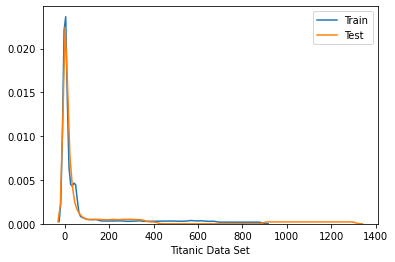

In [0]:
#plot of histogram for google dataset
x = train_titanicData
y = test_titanicData
sns.distplot(train_titanicData,hist=False, label='Train', axlabel= 'Titanic Data Set')
sns.distplot(test_titanicData, hist = False, label = 'Test')

# **SVM Classifier**

Divide the trainset and testset into x and y and apply the SVM Classifier with linear kernel

In [0]:
y1 = train_titanicData['Survived']
x1 = train_titanicData.drop(['Survived'], axis =1)

xtest = test_titanicData
ytest = test_titanicData

In [0]:

#Create a svm Classifier
clf = SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets

clf.fit(x1.values, y1.values)

y_prediction = clf.predict(xtest.values)

In [0]:
y_prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [0]:
np.savetxt("predictionTitanic.csv", y_prediction, delimiter=",")

In [0]:
df = pd.DataFrame({"PassengerId" : test_titanicData['PassengerId'], "Survived" : y_prediction})
df.to_csv("predictionTitanic2.csv", index=False)

After uploading it to Kaggle in https://www.kaggle.com/c/titanic/submit, 

**the predicted Titanic survival correctly for 70% of people.:** score: 0.77511

# **Covriate shift adaptation**

In [0]:
train1 = train_titanicData
test1 = test_titanicData

In [0]:


train1['new'] = 0
test1['new'] = 1

concatData = train1.append(test1)
X_data = concatData.drop(columns=['new'], axis=1)
y_data = concatData['new']

In [124]:
    clf = RFC()
    predictions = np.zeros(y.shape)
    skf = SKF(n_splits=20, shuffle=True, random_state=721)

    for csFold, (train_idx, test_idx) in enumerate(skf.split(X_data, y_data)):
        print('Training discriminator model for fold {}'.format(csFold))
        X_train, X_test = X_data.iloc[train_idx], X_data.iloc[test_idx]
        y_train, y_test = y_data.iloc[train_idx], y_data.iloc[test_idx]

        nanX_test = np.isnan(X_test)
        nany_train = np.isnan(y_train)
        nanX_train = np.isnan(X_train)
        X_train = ~nanX_train
        y_train = ~nany_train
        X_test = ~nanX_test 

        clf.fit(X_train, y_train)
        probs = clf.predict_proba(X_test)[:1]
        predictions[test_idx] = probs

    weights = np.exp(predictions)*len(train1)/len(test1)
    finalWeights = weights[:len(train1)]

Training discriminator model for fold 0
Training discriminator model for fold 1
Training discriminator model for fold 2
Training discriminator model for fold 3
Training discriminator model for fold 4
Training discriminator model for fold 5
Training discriminator model for fold 6
Training discriminator model for fold 7
Training discriminator model for fold 8
Training discriminator model for fold 9
Training discriminator model for fold 10
Training discriminator model for fold 11
Training discriminator model for fold 12
Training discriminator model for fold 13
Training discriminator model for fold 14
Training discriminator model for fold 15
Training discriminator model for fold 16
Training discriminator model for fold 17
Training discriminator model for fold 18
Training discriminator model for fold 19


In [118]:
print ('ROC-AUC for X and Z distributions: ', AUC(y_data,predictions))


ROC-AUC for X and Z distributions:  0.5


In [125]:
finalWeights

array([5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423232,
       5.79423232, 5.79423232, 5.79423232, 5.79423232, 5.79423

In [0]:
clf = RFC()
clf.fit(x1.values,y1.values,sample_weight=finalWeights)
y_prediction = clf.predict(xtest.values)

In [146]:
y_prediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [0]:
df = pd.DataFrame({"PassengerId" : test_titanicData['PassengerId'], "Survived" : y_prediction})
df.to_csv("predictionTitanic8.csv", index=False)